In [1]:
# For inline plotting
%matplotlib inline

# For auto reloading
%load_ext autoreload
%autoreload 2

# Balanced Incomplete Block Design (BIBD) algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from bibd_layer import generate_bibd_mask, generate_fake_bibd_mask
from networkx.algorithms import bipartite

In [3]:
def plot_bibd(q):
    B = nx.Graph()
    B.add_nodes_from(['x{}'.format(j) for j in range(q*q)], bipartite=0)
    B.add_nodes_from(['y{}'.format(i) for i in range(q*(q+1))], bipartite=1)

    # Here w_ij = 1 iff x_j and y_i are connected
    W = generate_bibd_mask(q)
    W = W.astype(int)
    print(W)
    for i in range(q * (q + 1)):
        for j in range(q * q):
            if W[i][j] == 1:
                B.add_edges_from([('x{}'.format(j), 'y{}'.format(i))])

    X, Y = bipartite.sets(B)
    X = list(X)
    Y = list(Y)
    X.sort(key=lambda x: int(x[1:]))
    Y.sort(key=lambda y: int(y[1:]))
    offset = (len(Y) - len(X)) / 2
    posX = dict()
    posY = dict()
    # Put nodes from X at y = 1
    posX.update( (n, (i + offset, 1)) for i, n in enumerate(X) )
    # Put nodes from Y at y = 2
    posY.update( (n, (i, 2)) for i, n in enumerate(Y) )
    pos = { **posX, **posY }
    plt.subplots(figsize=(16,8))
    nx.draw_networkx_nodes(B, posX, nodelist=X, node_color='#d2527f', node_size=500)
    nx.draw_networkx_nodes(B, posY, nodelist=Y, node_color='#1e8bc3', node_size=500)
    nx.draw_networkx_edges(B, pos, width=1, alpha=1.0, edge_color='#000000')
    labelDict = {}
    for node in B.nodes:
        labelDict[node] = '${}_{{{}}}$'.format(node[0], node[1:])
    nx.draw_networkx_labels(B, pos, labelDict, font_color='#ffffff')

[[1 1 0 0]
 [0 0 1 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 0 1]
 [0 1 1 0]]


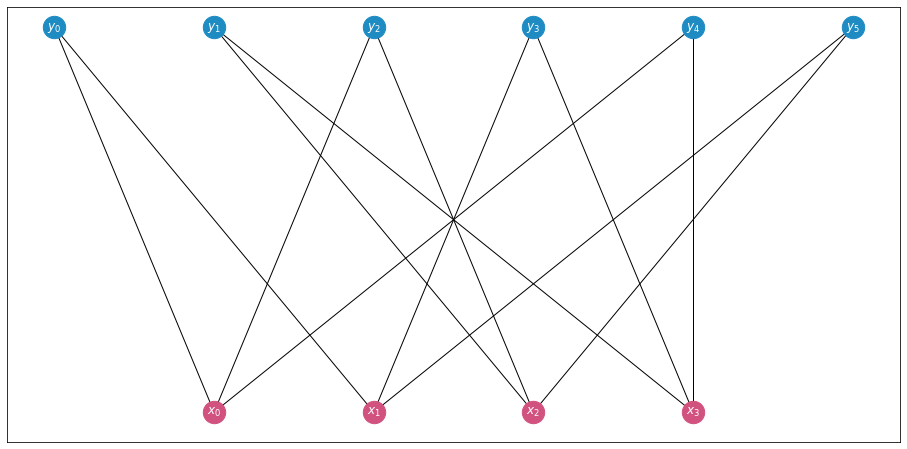

In [4]:
plot_bibd(2)

[[1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1]
 [1 0 0 1 0 0 1 0 0]
 [0 1 0 0 1 0 0 1 0]
 [0 0 1 0 0 1 0 0 1]
 [1 0 0 0 1 0 0 0 1]
 [0 1 0 0 0 1 1 0 0]
 [0 0 1 1 0 0 0 1 0]
 [1 0 0 0 0 1 0 1 0]
 [0 1 0 1 0 0 0 0 1]
 [0 0 1 0 1 0 1 0 0]]


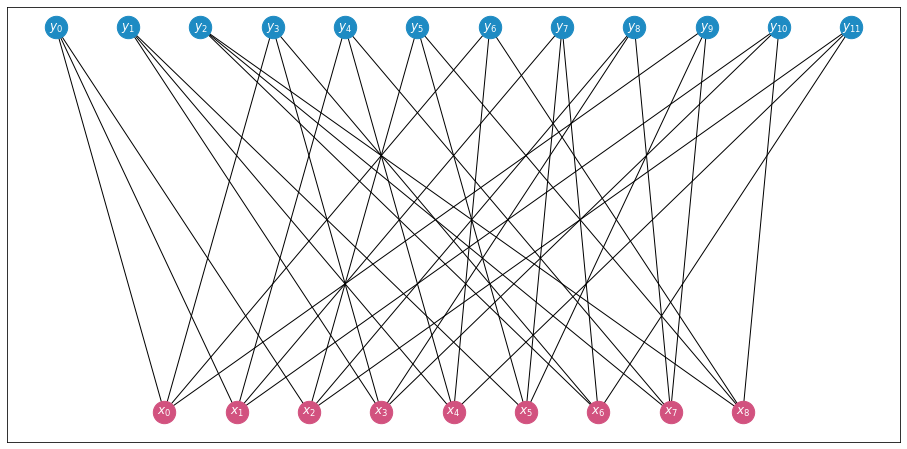

In [5]:
plot_bibd(3)

In [6]:
def plot_fake_bibd(v, b):
    B = nx.Graph()
    B.add_nodes_from(['x{}'.format(j) for j in range(v)], bipartite=0)
    B.add_nodes_from(['y{}'.format(i) for i in range(b)], bipartite=1)

    # Here w_ij = 1 iff x_j and y_i are connected
    W = generate_fake_bibd_mask(v, b)
    W = W.astype(int)
    print(W)
    for i in range(b):
        for j in range(v):
            if W[i][j] == 1:
                B.add_edges_from([('x{}'.format(j), 'y{}'.format(i))])

    X, Y = bipartite.sets(B)
    X = list(X)
    Y = list(Y)
    X.sort(key=lambda x: int(x[1:]))
    Y.sort(key=lambda y: int(y[1:]))
    offset = (len(Y) - len(X)) / 2
    posX = dict()
    posY = dict()
    # Put nodes from X at y = 1
    posX.update( (n, (i + offset, 1)) for i, n in enumerate(X) )
    # Put nodes from Y at y = 2
    posY.update( (n, (i, 2)) for i, n in enumerate(Y) )
    pos = { **posX, **posY }
    plt.subplots(figsize=(16,8))
    nx.draw_networkx_nodes(B, posX, nodelist=X, node_color='#d2527f', node_size=500)
    nx.draw_networkx_nodes(B, posY, nodelist=Y, node_color='#1e8bc3', node_size=500)
    nx.draw_networkx_edges(B, pos, width=1, alpha=1.0, edge_color='#000000')
    labelDict = {}
    for node in B.nodes:
        labelDict[node] = '${}_{{{}}}$'.format(node[0], node[1:])
    nx.draw_networkx_labels(B, pos, labelDict, font_color='#ffffff')

[[1 1 0 0]
 [0 0 1 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 0 1]
 [0 1 1 0]
 [1 1 0 0]
 [0 0 1 1]]


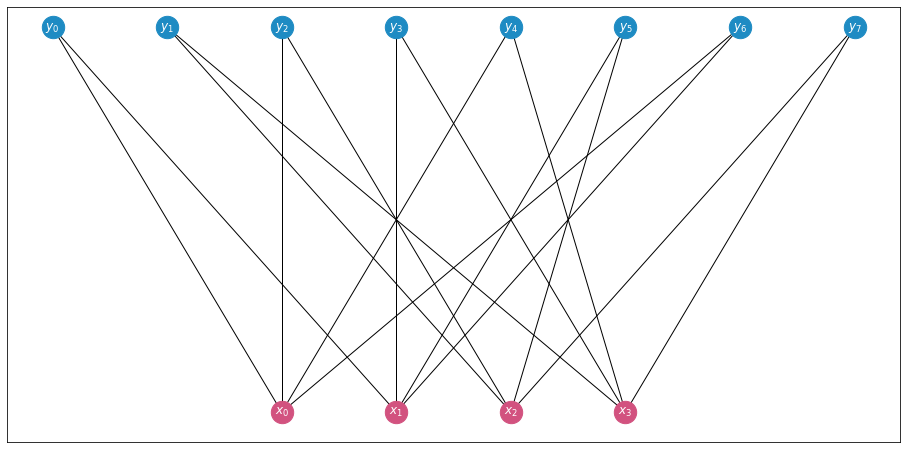

In [7]:
plot_fake_bibd(4, 8)

[[1 1 0 0]
 [0 0 1 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 0 1]
 [0 1 1 0]
 [1 1 0 0]
 [0 0 1 1]
 [1 0 1 0]]


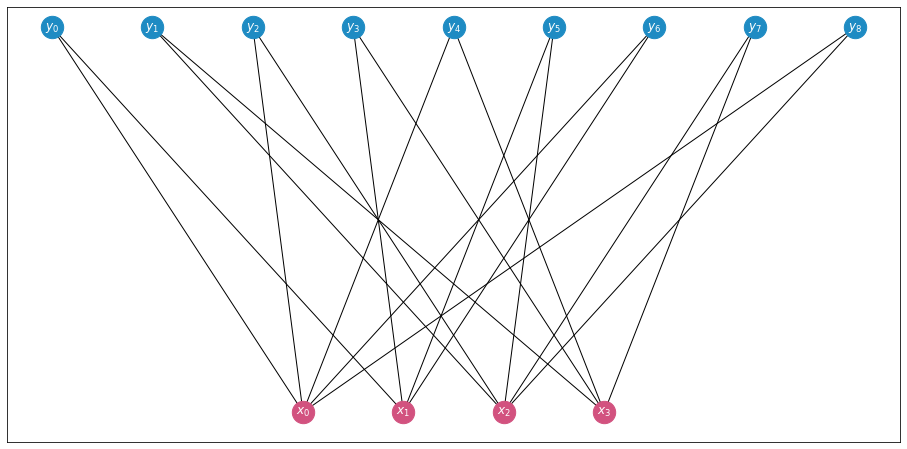

In [8]:
plot_fake_bibd(4, 9)

[[1 1 0 0]
 [0 0 1 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 0 1]
 [0 1 1 0]
 [1 1 0 0]
 [0 0 1 1]
 [1 0 1 0]
 [0 1 0 1]]


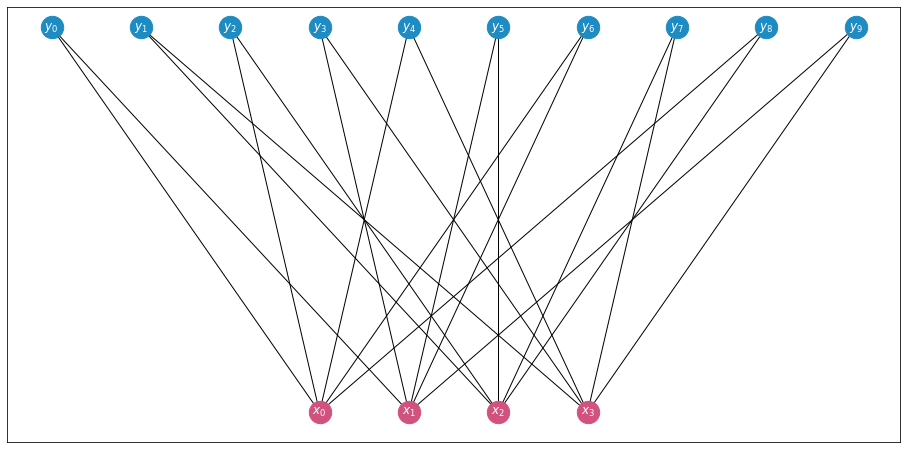

In [9]:
plot_fake_bibd(4, 10)

[[1 1 0 0]
 [0 0 1 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 0 1]
 [0 1 1 0]]


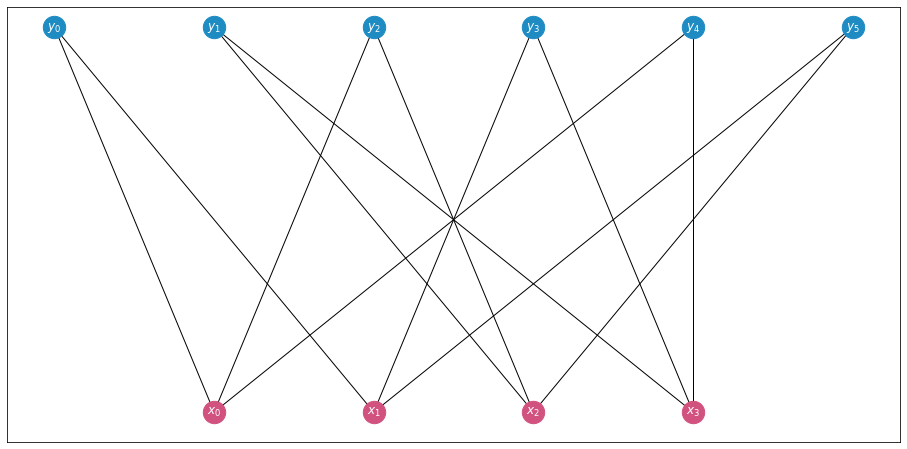

In [10]:
plot_fake_bibd(4, 6)

## Random sparse

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from bibd_layer import generate_random_sparse_mask
from networkx.algorithms import bipartite


def plot_random_sparse(v, b):
    B = nx.Graph()
    B.add_nodes_from(['x{}'.format(j) for j in range(v)], bipartite=0)
    B.add_nodes_from(['y{}'.format(i) for i in range(b)], bipartite=1)

    # Here w_ij = 1 iff x_j and y_i are connected
    W = generate_random_sparse_mask(v, b)
    W = W.astype(int)
    print(W)
    for i in range(b):
        for j in range(v):
            if W[i][j] == 1:
                B.add_edges_from([('x{}'.format(j), 'y{}'.format(i))])

    X, Y = bipartite.sets(B)
    X = list(X)
    Y = list(Y)
    X.sort(key=lambda x: int(x[1:]))
    Y.sort(key=lambda y: int(y[1:]))
    offset = (len(Y) - len(X)) / 2
    posX = dict()
    posY = dict()
    # Put nodes from X at y = 1
    posX.update( (n, (i + offset, 1)) for i, n in enumerate(X) )
    # Put nodes from Y at y = 2
    posY.update( (n, (i, 2)) for i, n in enumerate(Y) )
    pos = { **posX, **posY }
    plt.subplots(figsize=(16,8))
    nx.draw_networkx_nodes(B, posX, nodelist=X, node_color='#d2527f', node_size=500)
    nx.draw_networkx_nodes(B, posY, nodelist=Y, node_color='#1e8bc3', node_size=500)
    nx.draw_networkx_edges(B, pos, width=1, alpha=1.0, edge_color='#000000')
    labelDict = {}
    for node in B.nodes:
        labelDict[node] = '${}_{{{}}}$'.format(node[0], node[1:])
    nx.draw_networkx_labels(B, pos, labelDict, font_color='#ffffff')

[[1 0 1 0]
 [1 0 1 0]
 [0 1 1 0]
 [1 0 1 1]
 [0 1 0 0]
 [0 1 1 0]]


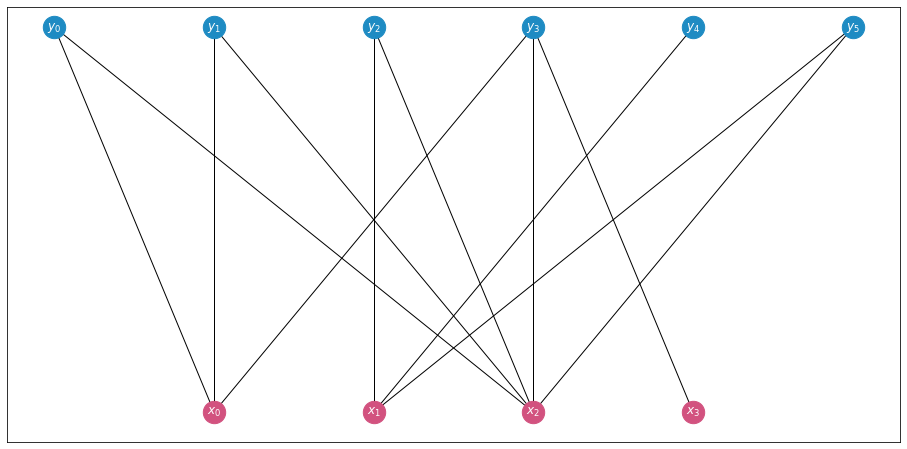

In [12]:
plot_random_sparse(4, 6)

[[1 0 0 0]
 [1 0 1 0]
 [1 1 0 0]
 [0 1 1 1]
 [0 1 1 0]
 [0 1 0 1]]


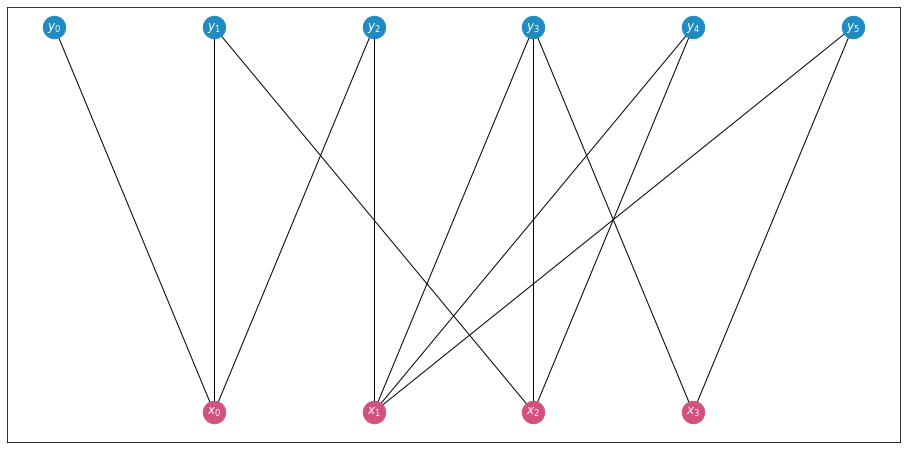

In [13]:
plot_random_sparse(4, 6)

[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


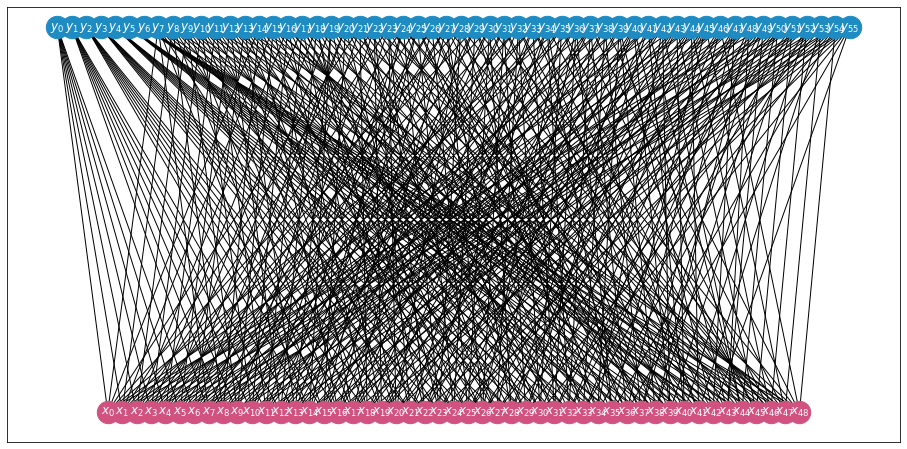

In [14]:
plot_bibd(7)

[[0 0 0 ... 0 1 0]
 [1 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 1]
 [0 1 0 ... 0 0 0]]


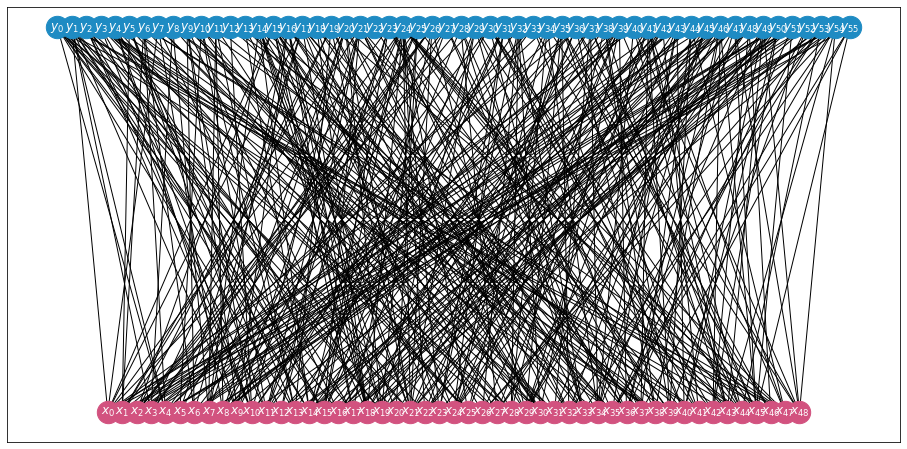

In [15]:
plot_random_sparse(7*7, 7*(7+1))